In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data_clean.csv file
df=pd.read_csv('data_clean.csv')
df.head()

,Year,Location,Avg Min Temp *C,Yr Rain mm,Heat Wave,Dry Spell,Cold Wave,Wet Spell,Irrigation,Crop Type,Crop Damage,Yield,Observer
0,1980,Lake Diane,20.2,731.72066,N,N,Y,N,Y,Barley,Y,1618.37,Mark Henderson
1,1980,Hillport,23.1,617.77118,N,N,Y,N,Y,Barley,Y,1728.69,Jacqueline Jones
2,1980,Spencerborough,21.1,1170.91968,N,N,N,N,N,Barley,N,1496.14,Rita Curry
3,1981,Lake Diane,19.6,793.69158,N,N,Y,N,Y,Oats,Y,887.85,Karen Moreno
4,1981,Hillport,23.1,616.65104,N,N,Y,N,Y,Oats,Y,1028.50,Katie Martinez


## Baseline Properties & Count Questions 

### 1. Determine the following basic details about the data. (Presented as a table would be ideal, but not required):

- __What is the “Year” range (max, min) of the data collected?__

In [3]:
year_max = df['Year'].loc[df['Year'].idxmax()] # Maximum in column
year_min = df['Year'].loc[df['Year'].idxmin()]# Min in column
print("The Year range (max, min) of the data collected : " +str(year_min)+"-"+str(year_max))

The Year range (max, min) of the data collected : 1980-2019


- __Are there any missing years in the data? If so, which?__

In [4]:
df['Year'].isnull().sum()

0

In [5]:
df2=pd.read_csv('data_2_env.csv')
df2['Year'].isnull().sum()

0

In [6]:
df1=pd.read_csv('data_1_env.csv')
df1['Year'].isnull().sum()

0

In [7]:
df3=pd.read_csv('data_3_crop.csv')
df3['Year'].isnull().sum()

1

There is no mission data in data_clean,data_1_env and data_2_env but one data mission in data_3_crop.

- __What are the “Locations” (values) in the data?__

In [8]:
df['Location'].unique()

array(['Lake Diane', 'Hillport', 'Spencerborough'], dtype=object)

There are 3 locations name as 'Lake Diane', 'Hillport', 'Spencerborough'

- __What are the “Crop Types” (values) in the data?__

In [9]:
df['Crop Type'].unique()

array(['Barley', 'Oats', 'Maize'], dtype=object)

There are 3 locations name as 'Barley', 'Oats', 'Maize'

- __What is the range (min, max) of the temperature values?__

In [10]:
temp_max = df['Avg Min Temp *C'].loc[df['Avg Min Temp *C'].idxmax()] # Maximum in column
temp_min = df['Avg Min Temp *C'].loc[df['Avg Min Temp *C'].idxmin()]# Min in column
print("The range (min, max) of the temperature values in *C :" +str(temp_min)+"-"+str(temp_max))

The range (min, max) of the temperature values in *C :19.6-25.3


- __What is the range (min, max) of the rainfall values?__

In [11]:
rainfall_max = df['Yr Rain mm'].loc[df['Yr Rain mm'].idxmax()] # Maximum in column
rainfall_min = df['Yr Rain mm'].loc[df['Yr Rain mm'].idxmin()]# Min in column
print("The range (min, max) of the rainfall values in Yr Rain mm :" +str(rainfall_min)+" - "+str(rainfall_max))

The range (min, max) of the rainfall values in Yr Rain mm :594.46922 - 2155.3


### 2. Have all locations been used every year of data collection?

In [12]:
for i in range(year_min,year_max+1):
    value = df.loc[df['Year'] == i, 'Location']
    if len(value)==3:
        continue
    else:
        print(len(value))
    

2
2
2
2
2


We know that data was obtained at 3 locations above.  So if the data is obtained at 3 locations in each year, the len(value) should be equal to 3. But some times it equal to 2. Therefore, it can be concluded that data has not been obtained from every location in every year.  The respective location and year are as follows.

In [13]:
for i in range(year_min,year_max+1):
    value = df.loc[df['Year'] == i, 'Location']
    if len(value)==3:
        continue
    else:
        print(i)
        print(value)
        print('----------------------------')

1984
12        Lake Diane
13    Spencerborough
Name: Location, dtype: object
----------------------------
1985
14      Hillport
15    Lake Diane
Name: Location, dtype: object
----------------------------
1989
25    Spencerborough
26        Lake Diane
Name: Location, dtype: object
----------------------------
2003
66      Hillport
67    Lake Diane
Name: Location, dtype: object
----------------------------
2013
95    Spencerborough
96          Hillport
Name: Location, dtype: object
----------------------------


### 3. Do locations always have the same “Irrigated” value or does it change over the years?


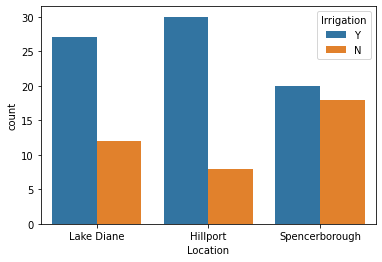

In [14]:
sns.countplot(x='Location', hue='Irrigation', data=df)

plt.show()

According to the above plot, the irrigated value has changed according to the location.

### 3. Explore the “Crop” data:

- __What is the total occurrence (count used) of each crop type in the sample?__

In [15]:
print(df['Crop Type'].value_counts())

Maize     46
Oats      38
Barley    31
Name: Crop Type, dtype: int64


- __What is the break-down (count used) of “crop type” at each location?__

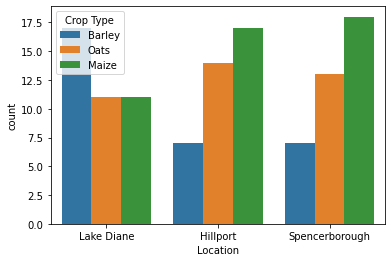

In [16]:
sns.countplot(x='Location', hue='Crop Type', data=df)

plt.show()

- __What is the total yield for each crop type over the entire sample? (Yield total by type?)__

In [17]:
print(df.groupby('Crop Type')['Yield'].sum())

Crop Type
Barley    50798.83
Maize     61153.58
Oats      35340.98
Name: Yield, dtype: float64


- __Has there been any changes in crop type usage over time? (Trends? Uniform? Plot?)__


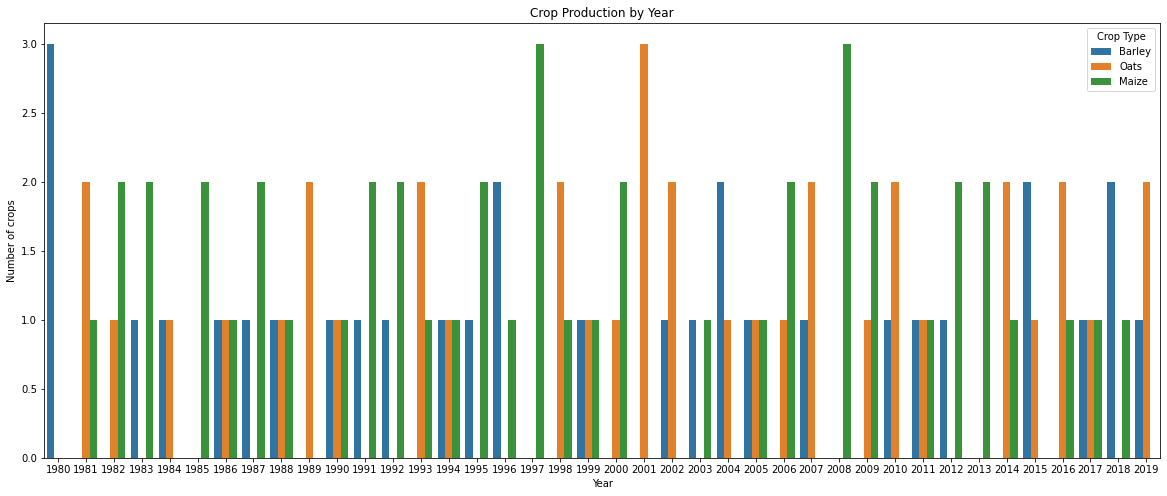

In [18]:
sns.countplot(data=df, x='Year', hue='Crop Type')

# Add title and axis labels
plt.title('Crop Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of crops')

# Show plot
plt.gcf().set_size_inches(20, 8)
plt.show()

It will be clear from the above plot that the crop type is not uniform over time.

### 4. Staff members making obversions


- __Who was the longest serving staff member(s) making observations?__
 - How many years and at what location? 

In [19]:
print(df['Observer'].value_counts())

Ronald Horn         4
Kristin Lawrence    4
Meghan Marquez      4
Sean Gibson         3
Kelly Taylor        3
                   ..
Jacqueline Jones    1
Judy Bryant         1
Kevin Patterson     1
Taylor Garner       1
Katie Jones         1
Name: Observer, Length: 68, dtype: int64


In [20]:
workingYears = df.loc[df['Observer'] == "Ronald Horn", ['Year', 'Location']]
print(workingYears)


    Year        Location
5   1981  Spencerborough
8   1982  Spencerborough
11  1983  Spencerborough
14  1985        Hillport


In [21]:
workingYears = df.loc[df['Observer'] == "Kristin Lawrence", ['Year', 'Location']]
print(workingYears)

    Year        Location
86  2010        Hillport
89  2011        Hillport
92  2012      Lake Diane
95  2013  Spencerborough


In [22]:
workingYears = df.loc[df['Observer'] == "Meghan Marquez", ['Year', 'Location']]
print(workingYears)

     Year        Location
98   2014  Spencerborough
99   2014      Lake Diane
103  2016      Lake Diane
106  2017      Lake Diane


There were 3 people who took obversios 4 times.  But here, Meghan Marquez has worked in both Spencerborough and Lake Diane locations in 2014.  So Ronald Horn and Kristin Lawrence have served for 4 years.  Those years are as follows.

__Ronald Horn__
  - 1981  Spencerborough
  - 1982  Spencerborough
  - 1983  Spencerborough
  - 1985        Hillpor
  
__Kristin Lawrence__
  - 2010        Hillport
  - 2011        Hillport
  - 2012      Lake Diane
  - 2013  Spencerborough

- __Did any staff member join again after they first performed the role?__

In [23]:
print((df['Observer'].value_counts()>1).sum())

32


There are 32 staff members join again after they first performed the role

## General Relationships 

### 1. Is there a relationship between temperature and yield? (Consider “in general” is acceptable.)

<AxesSubplot:xlabel='Avg Min Temp *C', ylabel='Yield'>

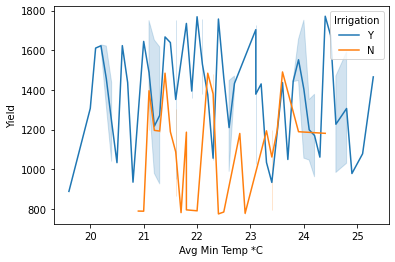

In [24]:
sns.lineplot(data=df, x='Avg Min Temp *C', y='Yield', hue='Irrigation')

- __Is there a different between the irrigated and non-irrigated crops?__

acording to above line plot, there are defferent between irrigated and non irrigated crop.

- __Note: The assumption is “yes there would be – not too cold and not too hot” and that “irrigated” locations
would do better than non-irrigated locations.__


according to above line plot irrigated locations better than non-irrigated locations

### 2. Is there a relationship between rainfall and yield? (Consider “in general” is acceptable.)


<AxesSubplot:xlabel='Yr Rain mm', ylabel='Yield'>

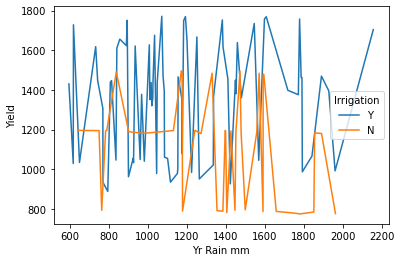

In [25]:
sns.lineplot(data=df, x='Yr Rain mm', y='Yield', hue='Irrigation')

### 3. Is there a difference in yield expectations for specific crop types?

<AxesSubplot:xlabel='Year', ylabel='Yield'>

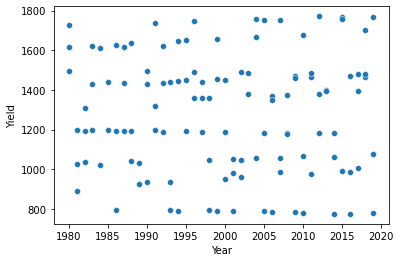

In [26]:
sns.scatterplot(data=df, x="Year", y="Yield")

- __Is there a difference in yield trends (over time) at different locations__

<AxesSubplot:xlabel='Year', ylabel='Yield'>

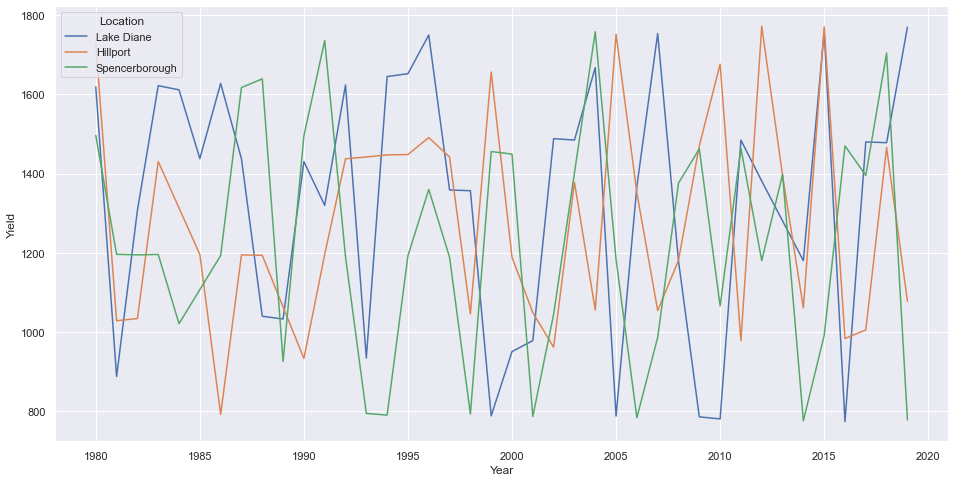

In [27]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.lineplot(data=df, x='Year', y='Yield', hue='Location')

- __What is the location that has performed best over the entire collection time?__

- __What is the crop type that has performed best over the entire collection time?__


<AxesSubplot:xlabel='Year', ylabel='Yield'>

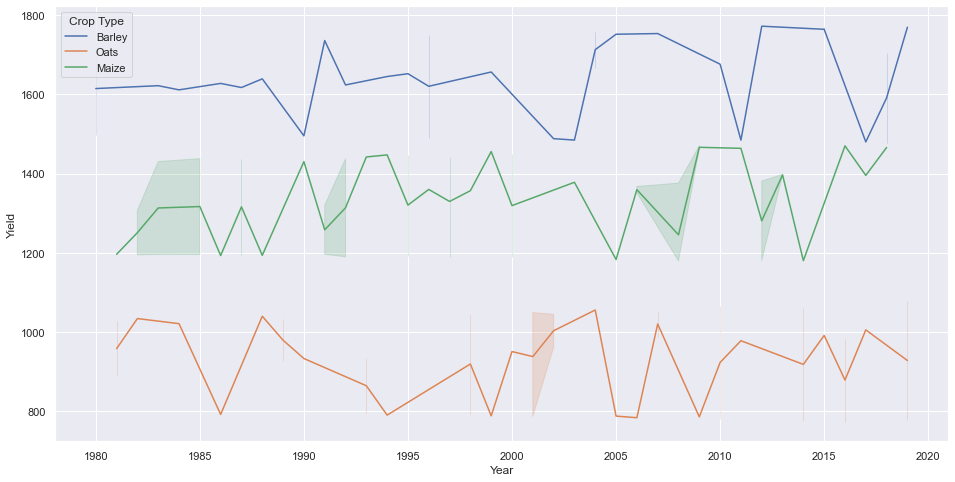

In [28]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.lineplot(data=df, x='Year', y='Yield', hue='Crop Type')

## Event Relationships (~2-5 marks each):

### 1. Show appropriate plots of Dry Spell and Heat Wave events to determine:

In [29]:
df2 = df[['Heat Wave', 'Dry Spell']].copy()

In [30]:
# count occurrences of each type
counts = df2.apply(pd.Series.value_counts)
print(counts)


   Heat Wave  Dry Spell
N         81        110
Y         34          5


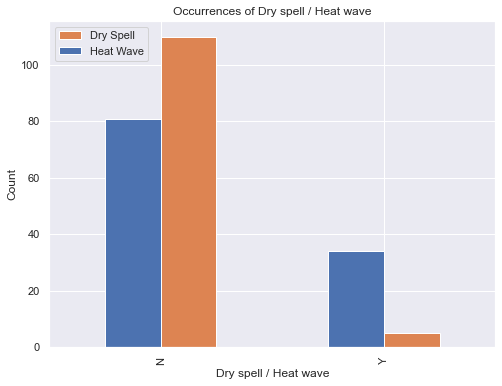

In [31]:
# plot stacked bar graph
ax = counts.plot(kind='bar', stacked=False, figsize=(8,6))

# set axis labels and title
ax.set_xlabel('Dry spell / Heat wave')
ax.set_ylabel('Count')
ax.set_title('Occurrences of Dry spell / Heat wave')

# set legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

# display plot
plt.show()

###### Which locations have had the most and least events, respectively?

In [32]:
grouped = df.groupby('Location')[['Dry Spell', 'Heat Wave']].apply(lambda x: (x == 'Y').sum())

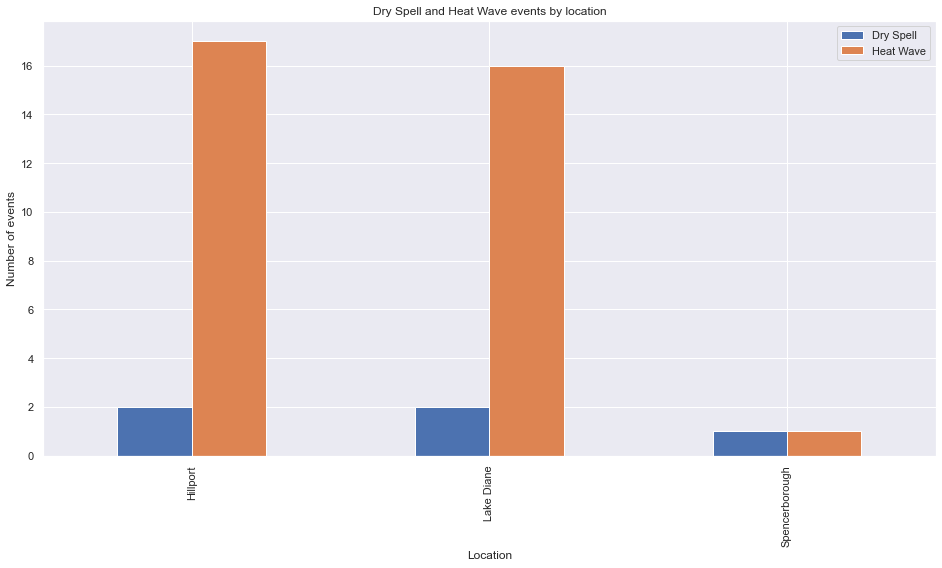

In [33]:
grouped.plot(kind='bar')
plt.title('Dry Spell and Heat Wave events by location')
plt.xlabel('Location')
plt.ylabel('Number of events')
plt.show()

###### Is there a relationship to temperature, rainfall, yield or year?

Related to above plots there is no relationships temperature,rainfall and yield


### 2. Show appropriate plots of Wet Spell and Cold Wave events.

In [34]:
df3 = df[['Wet Spell', 'Cold Wave']].copy()

In [35]:
# count occurrences of each type
counts = df3.apply(pd.Series.value_counts)
print(counts)

   Wet Spell  Cold Wave
N         57         97
Y         58         18


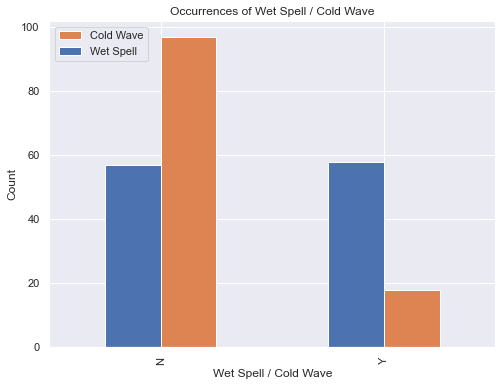

In [36]:
# plot stacked bar graph
ax = counts.plot(kind='bar', stacked=False, figsize=(8,6))

# set axis labels and title
ax.set_xlabel('Wet Spell / Cold Wave')
ax.set_ylabel('Count')
ax.set_title('Occurrences of Wet Spell / Cold Wave')

# set legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

# display plot
plt.show()

###### Which locations have had the most and least events, respectively?


In [37]:
grouped = df.groupby('Location')[['Wet Spell', 'Cold Wave']].apply(lambda x: (x == 'Y').sum())

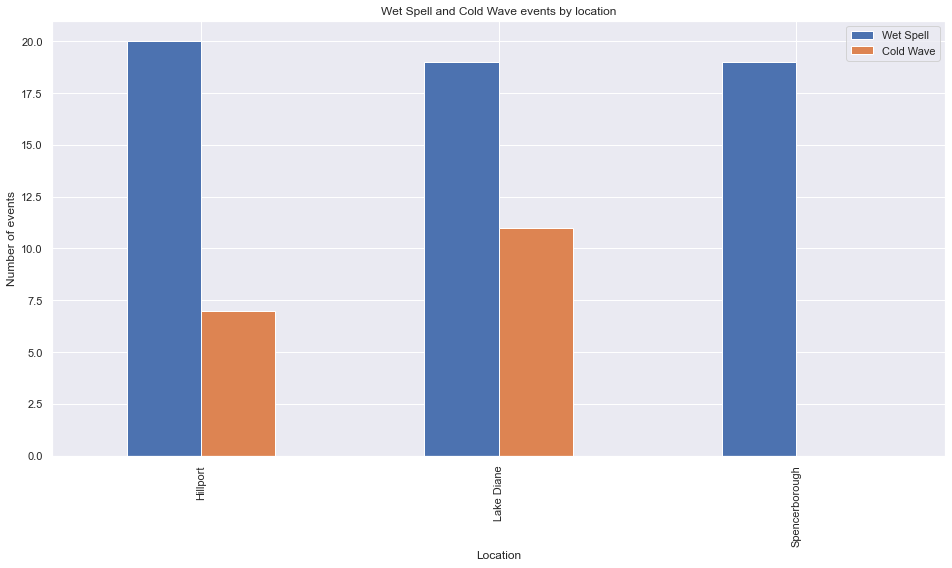

In [38]:
grouped.plot(kind='bar')
plt.title('Wet Spell and Cold Wave events by location')
plt.xlabel('Location')
plt.ylabel('Number of events')
plt.show()

###### Is there a relationship to temperature, rainfall, yield or year?

### 3.Show appropriate plots of Crop Damage event

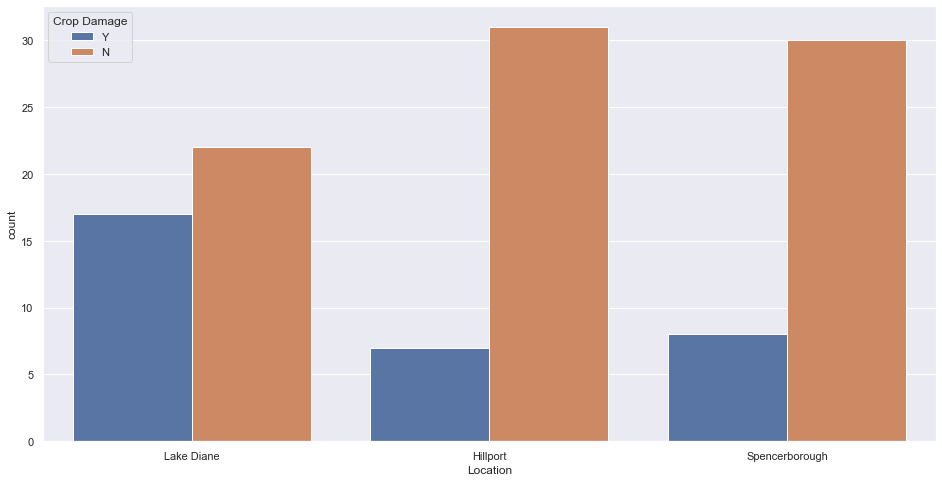

In [39]:
sns.countplot(x='Location', hue='Crop Damage',data=df)

plt.show()

In [40]:
# calculate the correlation between each pair of events
corr_matrix = df.corr()

# display the correlation matrix
print(corr_matrix)

                     Year  Avg Min Temp *C  Yr Rain mm     Yield
Year             1.000000         0.477509    0.579868 -0.024061
Avg Min Temp *C  0.477509         1.000000   -0.151837 -0.031915
Yr Rain mm       0.579868        -0.151837    1.000000 -0.091385
Yield           -0.024061        -0.031915   -0.091385  1.000000


## Temporal (Year) Relationships

##### 1.Is there an observable relationship between crop yield and the year?

#### For all locations combined?

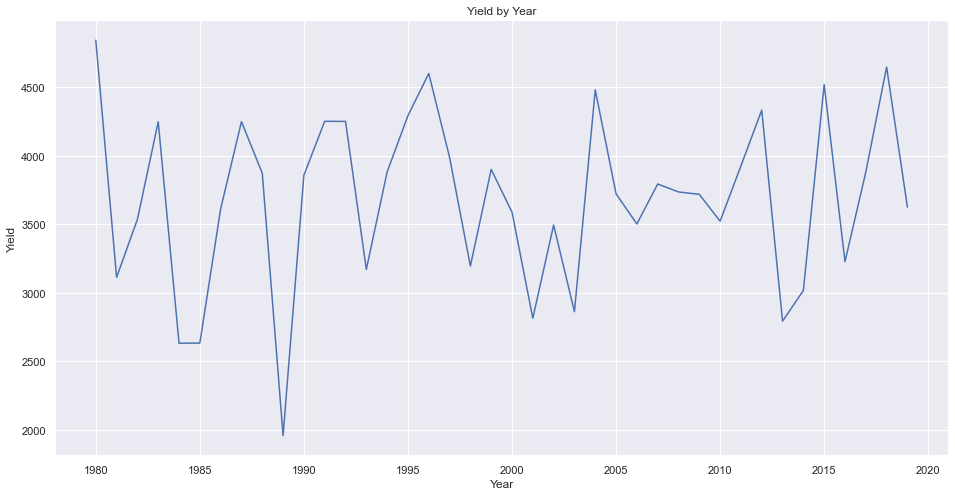

In [41]:
#calculate sum of yield for each year
yield_by_year = df.groupby('Year')['Yield'].sum()

#create line graph
yield_by_year.plot(kind='line', title='Yield by Year')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

##### At each location?

In [42]:
sum_df = df.groupby(['Year', 'Location'])['Yield'].sum().reset_index()

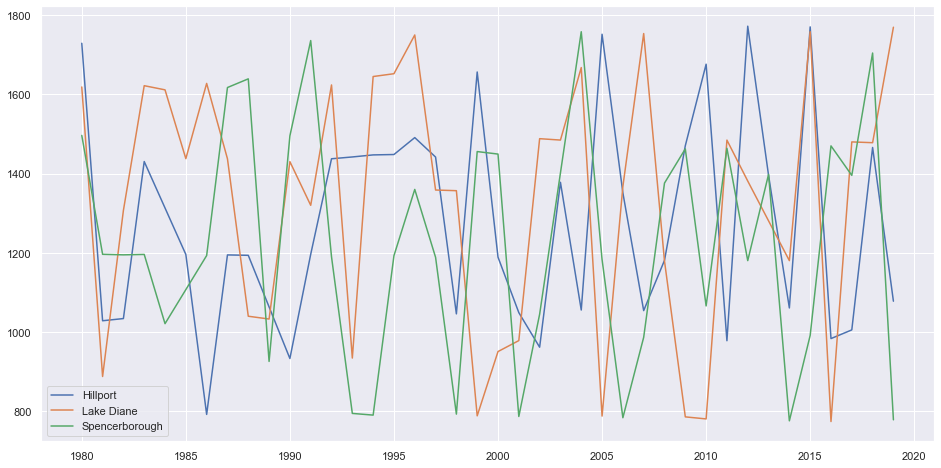

In [43]:
for loc, data in sum_df.groupby('Location'):
    plt.plot(data['Year'], data['Yield'], label=loc)

plt.legend()
plt.show()

##### 2. Is there an observable relationship between rain data and the year:


##### For all locations combined

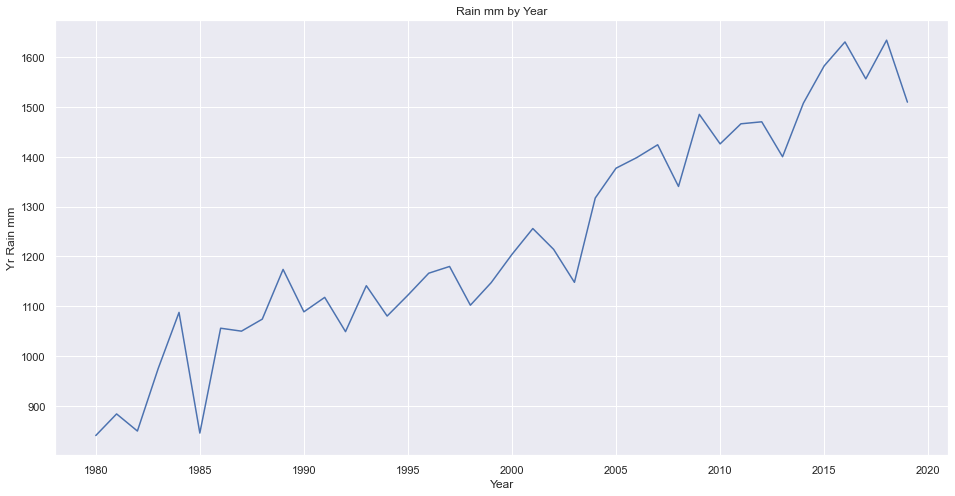

In [44]:
#calculate sum of rain for each year
rain_by_year = df.groupby('Year')['Yr Rain mm'].mean()

#create line graph
rain_by_year.plot(kind='line', title='Rain mm by Year')
plt.xlabel('Year')
plt.ylabel('Yr Rain mm')
plt.show()

##### At each location?

In [45]:
sum_df = df.groupby(['Year', 'Location'])['Yr Rain mm'].sum().reset_index()

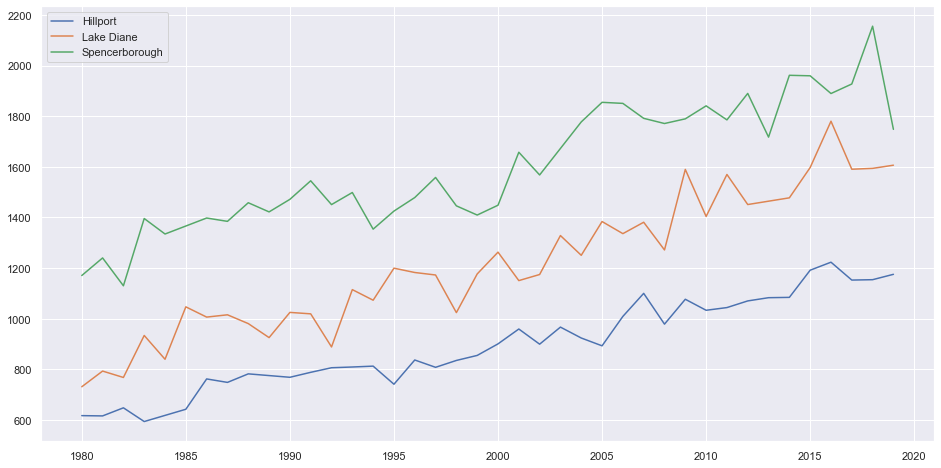

In [46]:
for loc, data in sum_df.groupby('Location'):
    plt.plot(data['Year'], data['Yr Rain mm'], label=loc)

plt.legend()
plt.show()

##### 3. Is there an observable relationship between temperature and the year?

#### For all locations combined?

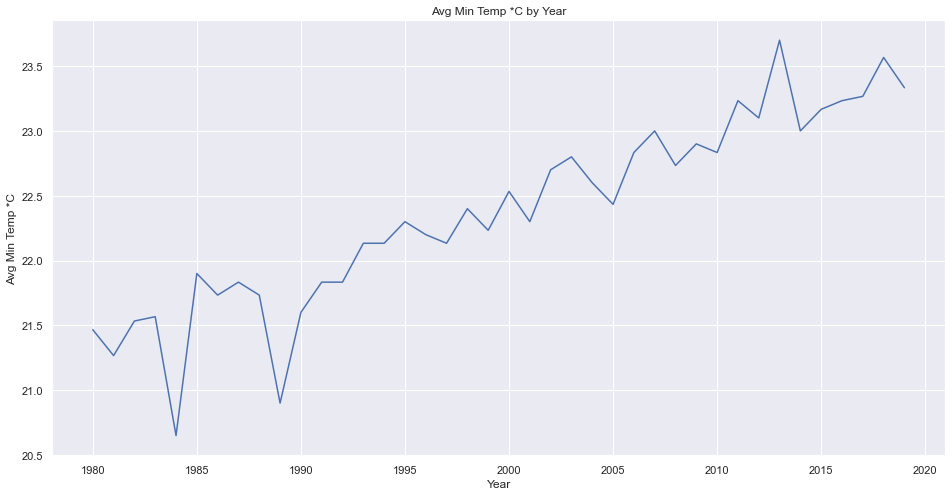

In [47]:
#calculate sum of temperature for each year
temp_by_year = df.groupby('Year')['Avg Min Temp *C'].mean()

#create line graph
temp_by_year.plot(kind='line', title='Avg Min Temp *C by Year')
plt.xlabel('Year')
plt.ylabel('Avg Min Temp *C')
plt.show()

##### At each location? 

In [48]:
sum_df = df.groupby(['Year', 'Location'])['Avg Min Temp *C'].sum().reset_index()

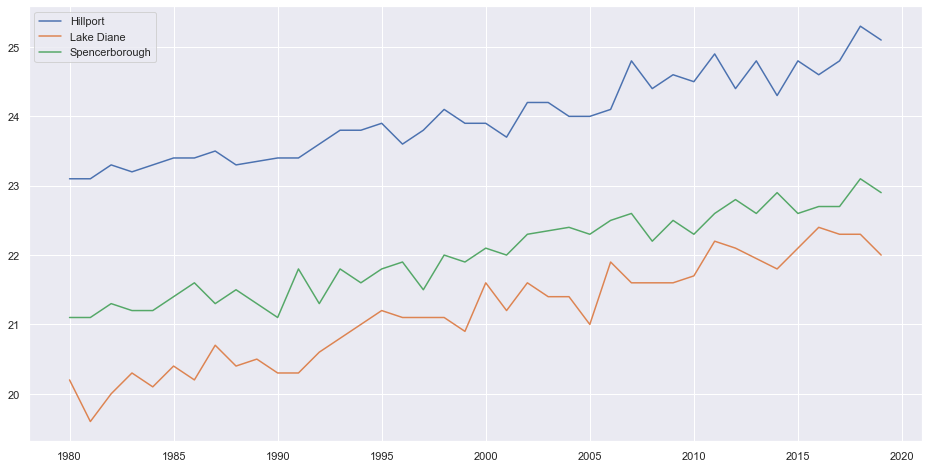

In [49]:
for loc, data in sum_df.groupby('Location'):
    plt.plot(data['Year'], data['Avg Min Temp *C'], label=loc)

plt.legend()
plt.show()

##### 4. Is there a relationship between Crop Damage and the year

##### For all locations combined?


In [50]:
df5 = df[['Year', 'Location','Crop Damage']].copy()

In [51]:
df5.head()

,Year,Location,Crop Damage
0,1980,Lake Diane,Y
1,1980,Hillport,Y
2,1980,Spencerborough,N
3,1981,Lake Diane,Y
4,1981,Hillport,Y


In [52]:
# Filtering data to get sum of Crop Damage related to years
df_yearly = df5.groupby(['Year', 'Crop Damage']).size().reset_index(name='Total')

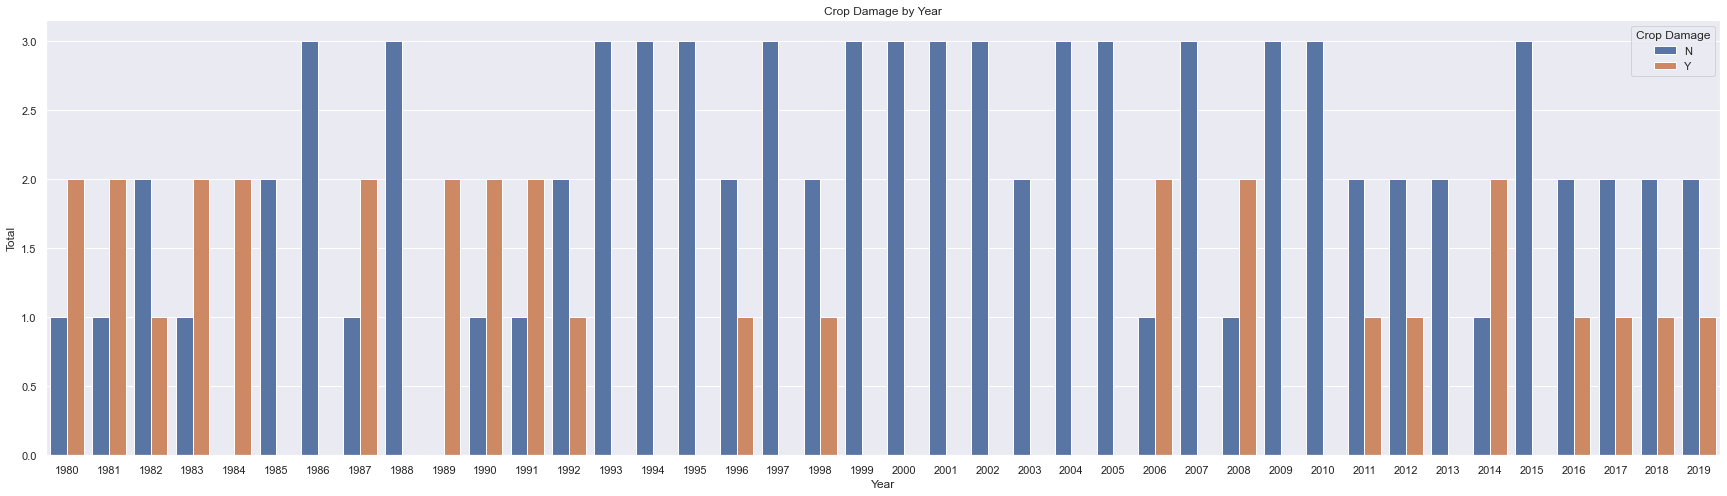

In [53]:
# Creating barplot using seaborn
sns.barplot(x='Year', y='Total', hue='Crop Damage', data=df_yearly)
plt.title('Crop Damage by Year')
plt.gcf().set_size_inches(30, 8)
plt.show()

##### At each location? 

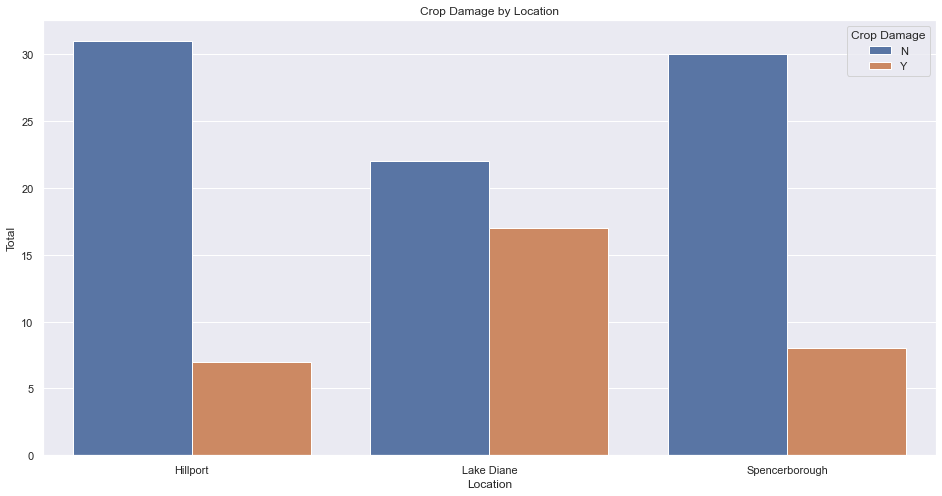

In [54]:
# Creating barplot for Crop Damage by Location
df_location = df.groupby(['Location', 'Crop Damage']).size().reset_index(name='Total')
sns.barplot(x='Location', y='Total', hue='Crop Damage', data=df_location)
plt.title('Crop Damage by Location')
plt.show()